# Clone Github

In [1]:
!git clone https://github.com/usmaaangul/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo.git

fatal: destination path 'Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo' already exists and is not an empty directory.


# Importing Using Libraries

















In [2]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


# Matrix
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
from keras.metrics import Recall, Precision


from keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard


#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras import layers

from keras.models import Model


from keras.callbacks import ReduceLROnPlateau

# specifically for cnn


from keras.layers import BatchNormalization, MaxPool2D, Conv2DTranspose, Concatenate, Input

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D ,GlobalAveragePooling2D
 
import tensorflow as tf
import random as rn
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils.np_utils import to_categorical

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2    
import imageio              
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

from keras import backend as K
import gc

# Loading Images

In [3]:
IMG_SIZE=224
epoch_size=50
batch_size=64
X1=list()
Z1=list()



def make_train_data(DIR_img,DIR_msk):

  for img in tqdm(os.listdir(DIR_img)):
    path = os.path.join(DIR_img,img)
    
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    #plt.imshow(img)
    X1.append(np.array(img))

  for msk in tqdm(os.listdir(DIR_msk)):
    path = os.path.join(DIR_msk,msk)
    img = imageio.mimread(path)[0]
    
    #img = cv2.imread(path,cv2.IMREAD_COLOR)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    
    #plt.imshow(img)
    #plt.show()
    img=np.expand_dims(img, axis=-1)
    
    Z1.append(np.array(img))

In [4]:
image_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/training/images'
mask_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/training/1st_manual'

make_train_data(image_dir,mask_dir)

100%|██████████| 20/20 [00:00<00:00, 297.61it/s]


# Data Augmentation

In [5]:
from albumentations import HorizontalFlip, VerticalFlip, ElasticTransform, GridDistortion, OpticalDistortion

def augment_data(images, masks):
  H = IMG_SIZE
  W = IMG_SIZE
  X=list()
  Y=list()

  for x, y in zip(images, masks):
    #_____________________________#
    aug = HorizontalFlip(p=1.0)
    augmented = aug(image=x, mask=y)
    x1 = augmented["image"]
    y1 = augmented["mask"]

    #x1 = cv2.resize(x1, (IMG_SIZE,IMG_SIZE))
    X.append(x1)

    #y1 = cv2.resize(y1, (IMG_SIZE,IMG_SIZE))
    #y1=np.array(y1)
    #y1=np.expand_dims(y1, axis=-1)
    Y.append(y1)



    #_____________________________#
    aug = VerticalFlip(p=1.0)
    augmented = aug(image=x, mask=y)
    x2 = augmented["image"]
    y2 = augmented["mask"]

    #x2 = cv2.resize(x2, (IMG_SIZE,IMG_SIZE))
    X.append(x2)

    #y2 = cv2.resize(y2, (IMG_SIZE,IMG_SIZE))
    #y2=np.array(y2)
    #y2=np.expand_dims(y2, axis=-1)
    Y.append(y2)



    #_____________________________#
    aug = ElasticTransform(p=1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03)
    augmented = aug(image=x, mask=y)
    x3 = augmented['image']
    y3 = augmented['mask']

    #x3 = cv2.resize(x3, (IMG_SIZE,IMG_SIZE))
    X.append(x3)

    #y3 = cv2.resize(y3, (IMG_SIZE,IMG_SIZE))
    #y3=np.array(y3)
    #y3=np.expand_dims(y3, axis=-1)
    Y.append(y3)


    #_____________________________#
    aug = GridDistortion(p=1)
    augmented = aug(image=x, mask=y)
    x4 = augmented['image']
    y4 = augmented['mask']

    #x4 = cv2.resize(x4, (IMG_SIZE,IMG_SIZE))
    X.append(x4)

    #y4 = cv2.resize(y4, (IMG_SIZE,IMG_SIZE))
    #y4=np.array(y4)
    #y4=np.expand_dims(y4, axis=-1)
    Y.append(y4)


    #_____________________________#
    aug = OpticalDistortion(p=1, distort_limit=2, shift_limit=0.5)
    augmented = aug(image=x, mask=y)
    x5 = augmented['image']
    y5 = augmented['mask']

    #x5 = cv2.resize(x5, (IMG_SIZE,IMG_SIZE))
    X.append(x5)

    #y5 = cv2.resize(y5, (IMG_SIZE,IMG_SIZE))
    #y5=np.array(y5)
    #y5=np.expand_dims(y5, axis=-1)
    Y.append(y5)




    #_____________________________#
    #x = cv2.resize(x, (IMG_SIZE,IMG_SIZE))
    X.append(x)

    #y = cv2.resize(y, (IMG_SIZE,IMG_SIZE))
    #y=np.array(y)
    #y=np.expand_dims(y, axis=-1)
    Y.append(y)

            

  return X,Y

In [6]:
X,Y=augment_data(X1,Z1)

# Normalize the data

In [7]:
X=np.array(X)
X=X/255

Y=np.array(Y)
Y=Y/255

# Display some images and it's masks

In [8]:
X.shape

(120, 224, 224, 3)

In [9]:
Y.shape

(120, 224, 224, 1)

In [10]:
check=Y
check = np.concatenate([check, check, check], axis=-1)
check.shape

(120, 224, 224, 3)

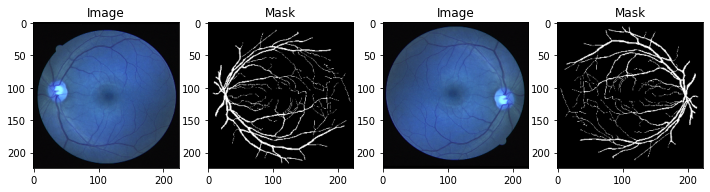

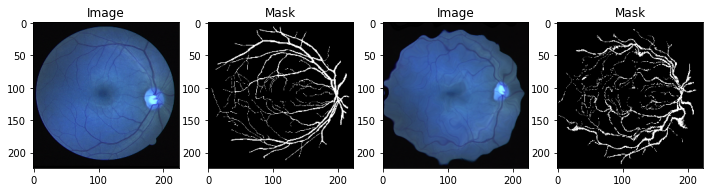

In [11]:
## displaying data loaded by our function
for num in range(2):
  plt.figure(figsize=(12,6))
  plt.subplot(1,4,1)
  plt.imshow(X[num])
  plt.title("Image")
  plt.subplot(1,4,2)
  plt.imshow(check[num])
  plt.title("Mask")
  plt.subplot(1,4,3)
  plt.imshow(X[num+1])
  plt.title("Image")
  plt.subplot(1,4,4)
  plt.imshow(check[num+1])
  plt.title("Mask")
  plt.show()

# Split data into training and testing and Validation set

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_test,y_test, test_size=0.5)

In [13]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

### Model uning Functionl API's from keras

In [14]:
def Conv2dBlock(inputTensor, numFilters, kernelSize = 3, doBatchNorm = True):
    #first Conv
    x = tf.keras.layers.Conv2D(filters = numFilters, kernel_size = (kernelSize, kernelSize),
                              kernel_initializer = 'he_normal', padding = 'same') (inputTensor)
    
    if doBatchNorm:
        x = tf.keras.layers.BatchNormalization()(x)
        
    x =tf.keras.layers.Activation('relu')(x)
    
    #Second Conv
    x = tf.keras.layers.Conv2D(filters = numFilters, kernel_size = (kernelSize, kernelSize),
                              kernel_initializer = 'he_normal', padding = 'same') (x)
    if doBatchNorm:
        x = tf.keras.layers.BatchNormalization()(x)
        
    x = tf.keras.layers.Activation('relu')(x)
    
    return x


def GiveMeUnet(inputImage, numFilters = 16, droupouts = 0.1, doBatchNorm = True):
    # defining encoder Path
    c1 = Conv2dBlock(inputImage, numFilters * 1, kernelSize = 3, doBatchNorm = doBatchNorm)
    p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)
    p1 = tf.keras.layers.Dropout(droupouts)(p1)
    
    c2 = Conv2dBlock(p1, numFilters * 2, kernelSize = 3, doBatchNorm = doBatchNorm)
    p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)
    p2 = tf.keras.layers.Dropout(droupouts)(p2)
    
    c3 = Conv2dBlock(p2, numFilters * 4, kernelSize = 3, doBatchNorm = doBatchNorm)
    p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)
    p3 = tf.keras.layers.Dropout(droupouts)(p3)
    
    c4 = Conv2dBlock(p3, numFilters * 8, kernelSize = 3, doBatchNorm = doBatchNorm)
    p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)
    p4 = tf.keras.layers.Dropout(droupouts)(p4)
    
    c5 = Conv2dBlock(p4, numFilters * 16, kernelSize = 3, doBatchNorm = doBatchNorm)
    
    # defining decoder path
    u6 = tf.keras.layers.Conv2DTranspose(numFilters*8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    u6 = tf.keras.layers.Dropout(droupouts)(u6)
    c6 = Conv2dBlock(u6, numFilters * 8, kernelSize = 3, doBatchNorm = doBatchNorm)
    
    u7 = tf.keras.layers.Conv2DTranspose(numFilters*4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    u7 = tf.keras.layers.Dropout(droupouts)(u7)
    c7 = Conv2dBlock(u7, numFilters * 4, kernelSize = 3, doBatchNorm = doBatchNorm)
    
    u8 = tf.keras.layers.Conv2DTranspose(numFilters*2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    u8 = tf.keras.layers.Dropout(droupouts)(u8)
    c8 = Conv2dBlock(u8, numFilters * 2, kernelSize = 3, doBatchNorm = doBatchNorm)
    
    u9 = tf.keras.layers.Conv2DTranspose(numFilters*1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1])
    u9 = tf.keras.layers.Dropout(droupouts)(u9)
    c9 = Conv2dBlock(u9, numFilters * 1, kernelSize = 3, doBatchNorm = doBatchNorm)
    
    output = tf.keras.layers.Conv2D(1, (1, 1), activation = 'sigmoid')(c9)
    model = tf.keras.Model(inputs = [inputImage], outputs = [output])
    return model

In [15]:
inputs = tf.keras.layers.Input((224, 224, 3))
model = GiveMeUnet(inputs, droupouts= 0.07)
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 224, 224, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

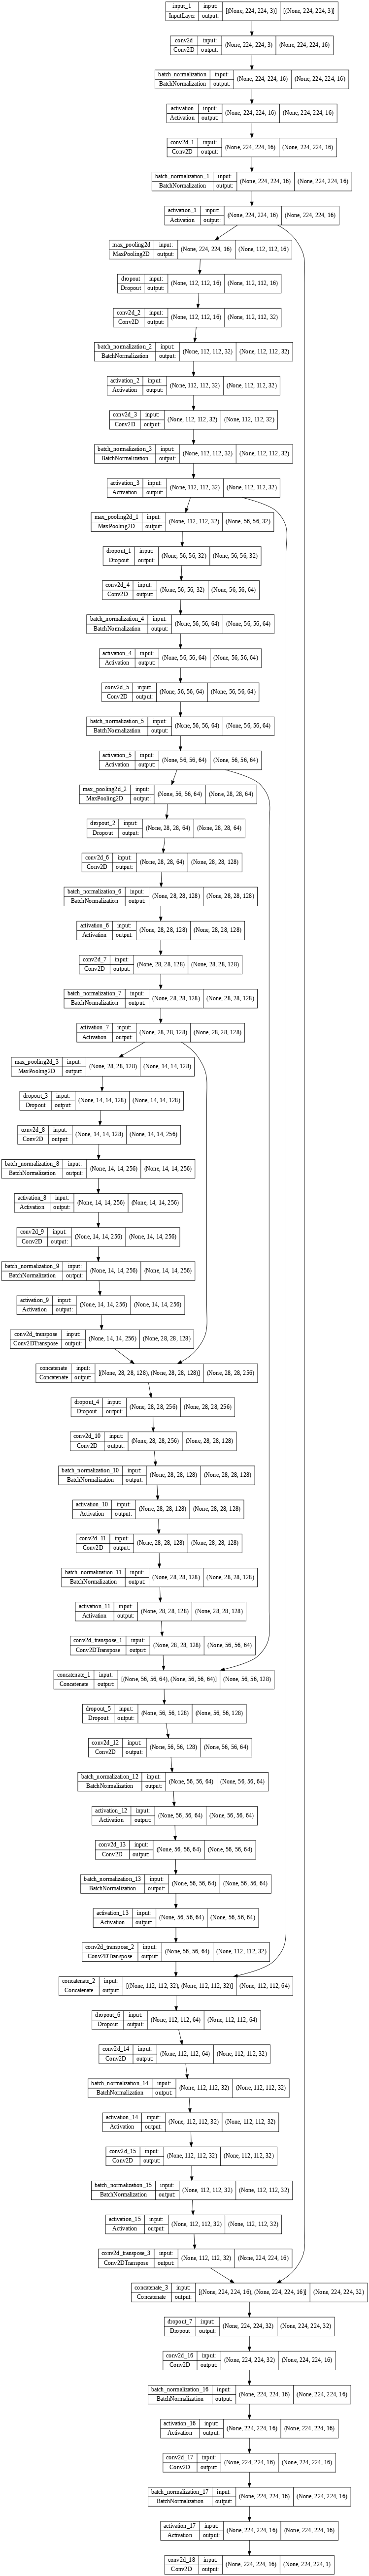

In [18]:
tf.keras.utils.plot_model(model, show_shapes=True,show_layer_names=True,dpi=60)

In [19]:
x_train[0].shape

(224, 224, 3)

In [20]:
x_test[0].shape

(224, 224, 3)

In [21]:
y_train[0].shape

(224, 224, 1)

In [22]:
History1 = model.fit(x_train,y_train,
                     batch_size=batch_size,epochs = epoch_size, 
                     validation_data = (x_valid,y_valid),verbose = 1)


history_df = pd.DataFrame(History1.history)

Epoch 1/50
2/2 [==============================] - 17s 6s/step - loss: 0.7747 - accuracy: 0.4724 - val_loss: 0.8244 - val_accuracy: 0.1858
Epoch 2/50
2/2 [==============================] - 1s 365ms/step - loss: 0.6958 - accuracy: 0.5374 - val_loss: 0.9891 - val_accuracy: 0.3137
Epoch 3/50
2/2 [==============================] - 1s 557ms/step - loss: 0.6407 - accuracy: 0.6040 - val_loss: 3.0160 - val_accuracy: 0.3349
Epoch 4/50
2/2 [==============================] - 1s 385ms/step - loss: 0.5969 - accuracy: 0.6832 - val_loss: 9.2212 - val_accuracy: 0.3119
Epoch 5/50
2/2 [==============================] - 1s 376ms/step - loss: 0.5612 - accuracy: 0.7588 - val_loss: 17.8074 - val_accuracy: 0.2963
Epoch 6/50
2/2 [==============================] - 1s 340ms/step - loss: 0.5316 - accuracy: 0.8052 - val_loss: 19.8982 - val_accuracy: 0.3118
Epoch 7/50
2/2 [==============================] - 1s 339ms/step - loss: 0.5059 - accuracy: 0.8313 - val_loss: 22.6481 - val_accuracy: 0.3519
Epoch 8/50
2/2 [===

## More Process

In [23]:
#model.save('model.h5')

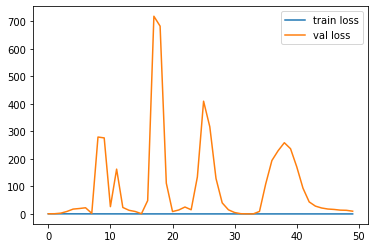

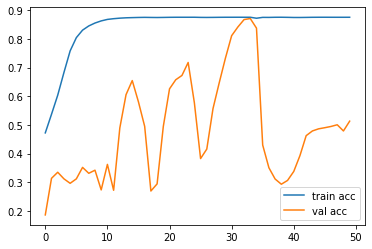

In [24]:
# plot the loss
plt.plot(History1.history['loss'], label='train loss')
plt.plot(History1.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# plot the accuracy
plt.plot(History1.history['accuracy'], label='train acc')
plt.plot(History1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [25]:
y_pred = model.predict(x_test)
y_pred = y_pred > 0.5
y_pred = y_pred.astype(np.int32)
y_pred = np.squeeze(y_pred, axis=-1)

In [26]:
y_pred = np.expand_dims(y_pred, axis=-1)
y_pred = np.concatenate([y_pred, y_pred, y_pred], axis=-1)

In [27]:
y_pred[0].shape

(224, 224, 3)

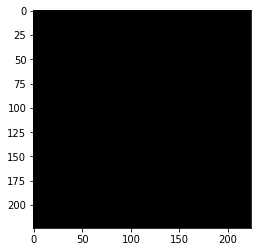

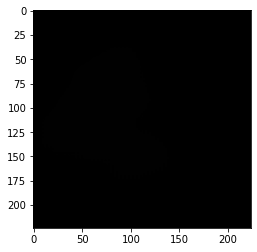

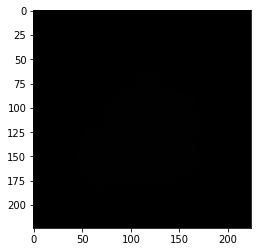

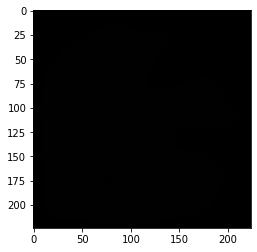

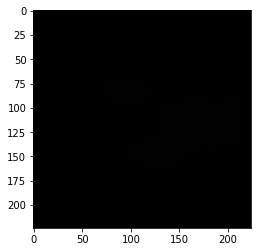

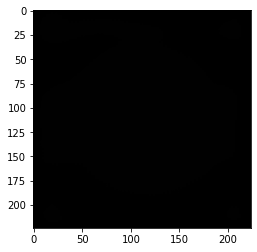

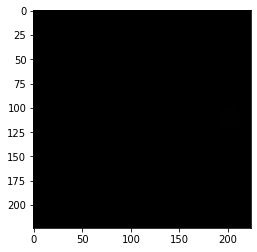

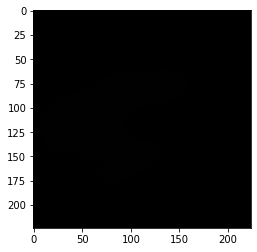

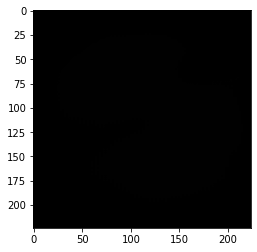

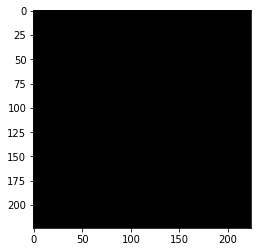

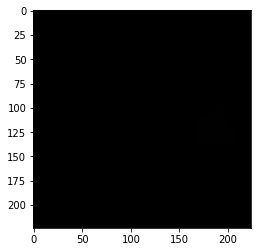

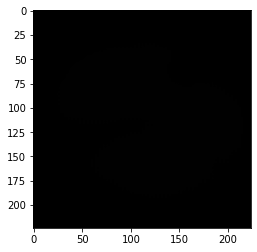

In [28]:
for i in range(12):
  plt.imshow(y_pred[i])
  plt.show()

In [29]:
y_test.shape

(12, 224, 224, 1)